In [30]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, model_selection
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,  classification_report,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [31]:
path = '../Dataset/data/restaurants_laptop_train_with_pos_task1_cleaned.csv'

df = pd.read_csv(path)
df.head()


,num,text,pos,aspect_tag,polarity
0,s_1,I,PRON,NAT,0
1,s_1,charge,VERB,NAT,0
2,s_1,it,PRON,NAT,0
3,s_1,at,ADP,NAT,0
4,s_1,night,NOUN,NAT,0


In [32]:
# punc = []
# for p in string.punctuation:
#     punc.append(p)
# df["text"] = df.apply(lambda r: r["text"].lower(), axis = 1)
# df = df[~df.text.isin(punc)]

In [33]:
# encoder = DictVectorizer(sparse=False)
le = preprocessing.LabelEncoder()

X = df.drop(columns=['aspect_tag','polarity'])
# X = encoder.fit_transform(X.to_dict('record'))
y = df.aspect_tag.values
y = le.fit_transform(y)
print('Classes: {}'.format(le.classes_))


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=42)
X_train = X_train.to_dict('record')
X_test = X_test.to_dict('record')
encoder = DictVectorizer(sparse=False).fit(X_train) # Only apply fit on the training data
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

X_train.shape, y_train.shape

Classes: ['AT' 'NAT']


C:\Users\sr_te\AppData\Local\Temp/ipykernel_17624/3886828007.py:12: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_train = X_train.to_dict('record')
C:\Users\sr_te\AppData\Local\Temp/ipykernel_17624/3886828007.py:13: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_test = X_test.to_dict('record')


((45264, 9200), (45264,))

In [34]:
def evaluate_model(model, test, label_test):
    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    
    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(np.unique(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)
    

In [35]:
lr = LogisticRegression(C=10, random_state = 42)
lr.fit(X_train, y_train)

C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=42)

accuracy: 0.9851316719688936
f1 0.9850218327457654
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6988
           1       0.99      0.99      0.99     38276

    accuracy                           0.99     45264
   macro avg       0.98      0.96      0.97     45264
weighted avg       0.99      0.99      0.99     45264



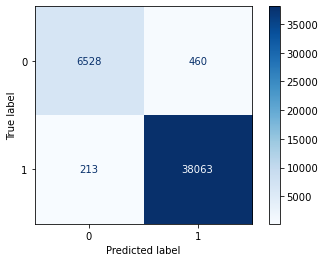

In [36]:
evaluate_model(lr, X_train,y_train)

accuracy: 0.9439731353835278
f1 0.9430103431563723
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1731
           1       0.96      0.97      0.97      9585

    accuracy                           0.94     11316
   macro avg       0.90      0.88      0.89     11316
weighted avg       0.94      0.94      0.94     11316



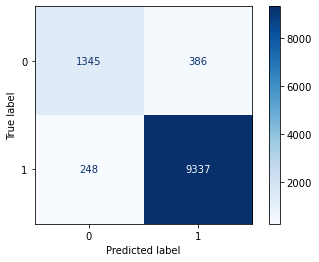

In [37]:
evaluate_model(lr, X_test,y_test)

accuracy: 0.8795068928950159
f1 0.8856629868747821
              precision    recall  f1-score   support

           0       0.58      0.76      0.66      6988
           1       0.95      0.90      0.93     38276

    accuracy                           0.88     45264
   macro avg       0.77      0.83      0.79     45264
weighted avg       0.90      0.88      0.89     45264



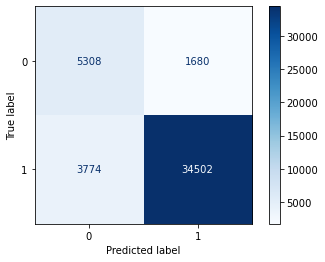

In [38]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 40)
dt.fit(X_train, y_train)
evaluate_model(dt, X_train,y_train)

accuracy: 0.8791092258748674
f1 0.8853567140957705
              precision    recall  f1-score   support

           0       0.58      0.76      0.66      1731
           1       0.95      0.90      0.93      9585

    accuracy                           0.88     11316
   macro avg       0.77      0.83      0.79     11316
weighted avg       0.90      0.88      0.89     11316



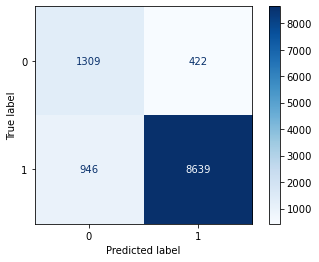

In [39]:
evaluate_model(dt, X_test,y_test)